# Background

In [1]:
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import requests
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf

In [2]:
"""
def rolling_intercept(x, y, window_size):
    intercepts = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the intercept using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        intercepts.append(intercept)

    return intercepts
"""

'\ndef rolling_intercept(x, y, window_size):\n    intercepts = []\n\n    for i in range(len(x) - window_size + 1):\n        x_window = x[i:i+window_size]\n        y_window = y[i:i+window_size]\n\n        # Calculate the intercept using numpy polyfit\n        slope, intercept = np.polyfit(x_window, y_window, 1)\n        intercepts.append(intercept)\n\n    return intercepts\n'

In [3]:
"""
def rolling_slope(x, y, window_size):
    slopes = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the slope using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        slopes.append(slope)

    return slopes
"""

'\ndef rolling_slope(x, y, window_size):\n    slopes = []\n\n    for i in range(len(x) - window_size + 1):\n        x_window = x[i:i+window_size]\n        y_window = y[i:i+window_size]\n\n        # Calculate the slope using numpy polyfit\n        slope, intercept = np.polyfit(x_window, y_window, 1)\n        slopes.append(slope)\n\n    return slopes\n'

In [4]:
"""
#Creat a function to calucalte stock/market return caompare value with previuos one
def Return_Rate(x,y,z):
  x = x.rename(columns = {"Adj Close": y})
  x["Date"] = pd.to_datetime(x["Date"])
  x[y] = pd.to_numeric(x[y])
  x["REF"] = x[y].shift(periods=1)
  x[z] = (x[y]-x["REF"])/x["REF"]
  x = x.dropna()
  x = x[["Index", "Date",y,"REF", z]]
  return x
"""

'\n#Creat a function to calucalte stock/market return caompare value with previuos one\ndef Return_Rate(x,y,z):\n  x = x.rename(columns = {"Adj Close": y})\n  x["Date"] = pd.to_datetime(x["Date"])\n  x[y] = pd.to_numeric(x[y])\n  x["REF"] = x[y].shift(periods=1)\n  x[z] = (x[y]-x["REF"])/x["REF"]\n  x = x.dropna()\n  x = x[["Index", "Date",y,"REF", z]]\n  return x\n'

In [5]:
"""
import numpy as np
from scipy.stats import ttest_rel
import pandas as pd

def rolling_intercept(x, y, window_size):
    intercepts = []
    intercept_p_values = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the intercept using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        intercepts.append(intercept)

    # Perform t-test for the intercept
    t_stat, p_value = ttest_rel(intercepts, np.zeros_like(intercepts))
    intercept_p_values = [p_value] * len(intercepts)

    return intercepts, intercept_p_values

def rolling_slope(x, y, window_size):
    slopes = []
    slope_p_values = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the slope using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        slopes.append(slope)

    # Perform t-test for the slope
    t_stat, p_value = ttest_rel(slopes, np.zeros_like(slopes))
    slope_p_values = [p_value] * len(slopes)

    return slopes, slope_p_values
"""

'\nimport numpy as np\nfrom scipy.stats import ttest_rel\nimport pandas as pd\n\ndef rolling_intercept(x, y, window_size):\n    intercepts = []\n    intercept_p_values = []\n\n    for i in range(len(x) - window_size + 1):\n        x_window = x[i:i+window_size]\n        y_window = y[i:i+window_size]\n\n        # Calculate the intercept using numpy polyfit\n        slope, intercept = np.polyfit(x_window, y_window, 1)\n        intercepts.append(intercept)\n\n    # Perform t-test for the intercept\n    t_stat, p_value = ttest_rel(intercepts, np.zeros_like(intercepts))\n    intercept_p_values = [p_value] * len(intercepts)\n\n    return intercepts, intercept_p_values\n\ndef rolling_slope(x, y, window_size):\n    slopes = []\n    slope_p_values = []\n\n    for i in range(len(x) - window_size + 1):\n        x_window = x[i:i+window_size]\n        y_window = y[i:i+window_size]\n\n        # Calculate the slope using numpy polyfit\n        slope, intercept = np.polyfit(x_window, y_window, 1)\n    

# Type in Data and Trade Name

In [6]:
#History Data Time Frame
Startdate = "2004-1-1"
Enddate = "2024-04-10"

Beta_year = 5
B = Beta_year*12
B = int(B)
print(B)

Startdate = pd.to_datetime(Startdate) - relativedelta(years=Beta_year)
Enddate = pd.to_datetime(Enddate)

Trade_Name = "XOM"

60


# Basic Data

In [7]:
#Risk-Free rate taken as Treasury bond from Yahoo Finance: 13 Week Treasury Bill: ^IRX, 	Treasury Yield 5 Years: ^FVX, Treasury Yield 10 Years: ^TNX, Treasury Yield 30 Years: ^TYX
TB10 = yf.download("^TNX",start=Startdate,end=Enddate, interval='1mo')
TB10.insert(0, "Index", range(1, 1 + len(TB10)))


[*********************100%%**********************]  1 of 1 completed


In [8]:
TB30 = yf.download("^TYX",start=Startdate,end=Enddate, interval='1mo')
TB30.insert(0, "Index", range(1, 1 + len(TB10)))

[*********************100%%**********************]  1 of 1 completed


In [9]:
BIL = yf.download("BIL",start=Startdate,end=Enddate, interval='1mo')
BIL.insert(0, "Index", range(1, 1 + len(BIL)))

[*********************100%%**********************]  1 of 1 completed


In [10]:
SP_500 = yf.download("^GSPC",start=Startdate,end=Enddate, interval='1mo')
SP_500.insert(0, "Index", range(1, 1 + len(SP_500)))

[*********************100%%**********************]  1 of 1 completed


In [11]:
NASDAQ = yf.download("^IXIC",start=Startdate,end=Enddate, interval='1mo')
NASDAQ.insert(0, "Index", range(1, 1 + len(NASDAQ)))

[*********************100%%**********************]  1 of 1 completed


In [12]:
VTI = yf.download("^DJI",start=Startdate,end=Enddate, interval='1mo')
VTI.insert(0, "Index", range(1, 1 + len(VTI)))

[*********************100%%**********************]  1 of 1 completed


In [13]:
Dow_Jones = yf.download("VTI",start=Startdate,end=Enddate, interval='1mo')
Dow_Jones.insert(0, "Index", range(1, 1 + len(Dow_Jones)))

[*********************100%%**********************]  1 of 1 completed


In [14]:
#Market Return based on S&P500 Index data from Yahoo Finance
Market = SP_500
Market = Market.reset_index(drop=False)

Market.head(10)

,Date,Index,Open,High,Low,Close,Adj Close,Volume
0,1999-01-01,1,1229.229980,1280.369995,1205.459961,1279.640015,1279.640015,16213500000
1,1999-02-01,2,1279.640015,1283.839966,1211.890015,1238.329956,1238.329956,14555860000
2,1999-03-01,3,1238.329956,1323.819946,1216.030029,1286.369995,1286.369995,18002500000
3,1999-04-01,4,1286.369995,1371.560059,1282.560059,1335.180054,1335.180054,18523200000
4,1999-05-01,5,1335.180054,1375.979980,1277.310059,1301.839966,1301.839966,15880260000
5,1999-06-01,6,1301.839966,1372.930054,1277.469971,1372.709961,1372.709961,16079170000
6,1999-07-01,7,1372.709961,1420.329956,1328.489990,1328.719971,1328.719971,15332930000
7,1999-08-01,8,1328.719971,1382.839966,1267.729980,1320.410034,1320.410034,15818550000
8,1999-09-01,9,1320.410034,1361.390015,1256.260010,1282.709961,1282.709961,16438700000
9,1999-10-01,10,1282.709961,1373.170044,1233.699951,1362.930054,1362.930054,18832000000


In [15]:
Market.describe()

,Date,Index,Open,High,Low,Close,Adj Close,Volume
count,304,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,3.040000e+02
mean,2011-08-16 16:44:12.631578880,152.50000,1981.129798,2048.290232,1910.868519,1992.465721,1992.465721,6.781252e+10
min,1999-01-01 00:00:00,1.00000,729.570007,832.979980,666.789978,735.090027,735.090027,1.455586e+10
25%,2005-04-23 12:00:00,76.75000,1210.174988,1242.292511,1167.534973,1210.174988,1210.174988,4.008103e+10
50%,2011-08-16 12:00:00,152.50000,1433.674988,1479.755005,1392.990051,1437.375000,1437.375000,7.315890e+10
75%,2017-12-08 18:00:00,228.25000,2536.702454,2698.464966,2446.785034,2598.660095,2598.660095,8.587833e+10
max,2024-04-01 00:00:00,304.00000,5257.970215,5264.850098,5056.819824,5254.350098,5254.350098,1.621854e+11
std,NaN,87.90146,1093.489905,1132.316803,1057.760688,1105.165906,1105.165906,3.042261e+10


In [16]:
Risk_Free = TB10
Risk_Free = Risk_Free.reset_index(drop=False)

Risk_Free.tail(100)

,Date,Index,Open,High,Low,Close,Adj Close,Volume
204,2016-01-01,205,2.230,2.261,1.911,1.931,1.931,0
205,2016-02-01,206,1.930,1.966,1.567,1.740,1.740,0
206,2016-03-01,207,1.749,2.002,1.728,1.786,1.786,0
207,2016-04-01,208,1.778,1.941,1.685,1.819,1.819,0
208,2016-05-01,209,1.816,1.890,1.705,1.834,1.834,0
...,...,...,...,...,...,...,...,...
299,2023-12-01,300,4.320,4.348,3.785,3.866,3.866,0
300,2024-01-01,301,3.969,4.198,3.894,3.967,3.967,0
301,2024-02-01,302,3.927,4.354,3.817,4.252,4.252,0
302,2024-03-01,303,4.268,4.348,4.038,4.206,4.206,0


In [17]:
Stock = yf.download(Trade_Name,start = Startdate, end = Enddate, interval='1mo')
Stock.insert(0, "Index", range(1, 1 + len(Stock)))
Stock = Stock.reset_index(drop=False)

[*********************100%%**********************]  1 of 1 completed


In [18]:
Stock.head()

,Date,Index,Open,High,Low,Close,Adj Close,Volume
0,1999-01-01,1,36.37500,37.90625,34.78125,35.12500,16.088873,152538200
1,1999-02-01,2,35.03125,36.71875,33.18750,33.28125,15.244362,160680200
2,1999-03-01,3,33.15625,38.18750,32.15625,35.28125,16.253403,206410000
3,1999-04-01,4,35.15625,42.62500,34.71875,41.53125,19.132656,196539400
4,1999-05-01,5,41.50000,43.62500,38.78125,39.93750,18.398441,180442400


# Return Rate

In [19]:
#Calcuate risk free return for each month
Risk_Free = Risk_Free.rename(columns = {"Adj Close":"TB"})
Risk_Free["Date"] = pd.to_datetime(Risk_Free["Date"])
Risk_Free["TB"] = pd.to_numeric(Risk_Free["TB"])
#Risk_Free["Risk-Free Return"] = Risk_Free["TB"]/100
#Risk_Free["Risk-Free Return"] = ((1+Risk_Free["Risk-Free Return"])**(1/12))-1

#Risk_Free["Risk-Free Return"] = Risk_Free["TB"].apply(lambda x: ((1 + x / 100) ** (1/12)) - 1)
Risk_Free["Risk-Free Return"] = Risk_Free["TB"].apply(lambda x: (x/12)/100)


Risk_Free = Risk_Free.dropna()

"""
first_value = Risk_Free["Risk-Free Return"].iloc[0]
Risk_Free["Risk-Free Return"] = first_value
"""

Risk_Free = Risk_Free[["Index", "Date", "TB", "Risk-Free Return"]]

Risk_Free.tail(10)

,Index,Date,TB,Risk-Free Return
294,295,2023-07-01,3.959,0.003299
295,296,2023-08-01,4.093,0.003411
296,297,2023-09-01,4.573,0.003811
297,298,2023-10-01,4.875,0.004063
298,299,2023-11-01,4.352,0.003627
299,300,2023-12-01,3.866,0.003222
300,301,2024-01-01,3.967,0.003306
301,302,2024-02-01,4.252,0.003543
302,303,2024-03-01,4.206,0.003505
303,304,2024-04-01,4.669,0.003891


In [20]:
#Creat a function to calucalte stock/market return caompare value with previuos one

def Return_Rate(x, y, z):
    x = x.rename(columns={"Adj Close": y})
    x["Date"] = pd.to_datetime(x["Date"])
    x[y] = pd.to_numeric(x[y])
    x[y + "_Prev"] = x[y].shift(periods=1)
    x[z] = x[y].pct_change()
    x = x.dropna()

    return x


In [21]:
Stock = Return_Rate(Stock, "Stock Value", "Stock Return")

Market = Return_Rate(Market, "Market Value", "Market Return")

In [22]:
Stock.tail(10)

,Date,Index,Open,High,Low,Close,Stock Value,Volume,Stock Value_Prev,Stock Return
294,2023-07-01,295,107.489998,108.459999,100.220001,107.239998,104.433640,350338600,104.443375,-0.000093
295,2023-08-01,296,106.949997,112.070000,104.570000,111.190002,108.280266,315896100,104.433640,0.036833
296,2023-09-01,297,112.199997,120.699997,112.199997,117.580002,115.441681,320550000,108.280266,0.066138
297,2023-10-01,298,117.529999,117.790001,104.540001,105.849998,103.924995,493930700,115.441681,-0.099762
298,2023-11-01,299,106.529999,109.190002,101.150002,102.739998,100.871559,433367400,103.924995,-0.029381
299,2023-12-01,300,102.500000,104.220001,97.480003,99.980003,99.059380,453909500,100.871559,-0.017965
300,2024-01-01,301,100.919998,104.879997,95.769997,102.809998,101.863312,413171900,99.059380,0.028306
301,2024-02-01,302,103.570000,105.430000,100.419998,104.519997,103.557571,360899900,101.863312,0.016633
302,2024-03-01,303,105.720001,116.449997,104.029999,116.239998,116.239998,353938800,103.557571,0.122467
303,2024-04-01,304,116.410004,123.750000,115.379997,117.959999,117.959999,346745900,116.239998,0.014797


In [23]:
Market.tail(10)

,Date,Index,Open,High,Low,Close,Market Value,Volume,Market Value_Prev,Market Return
294,2023-07-01,295,4450.479980,4607.069824,4385.049805,4588.959961,4588.959961,75063200000,4450.379883,0.031139
295,2023-08-01,296,4578.830078,4584.620117,4335.310059,4507.660156,4507.660156,86840820000,4588.959961,-0.017716
296,2023-09-01,297,4530.600098,4541.250000,4238.629883,4288.049805,4288.049805,73482980000,4507.660156,-0.048719
297,2023-10-01,298,4284.520020,4393.569824,4103.779785,4193.799805,4193.799805,83519460000,4288.049805,-0.021980
298,2023-11-01,299,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000,4193.799805,0.089179
299,2023-12-01,300,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000,4567.799805,0.044229
300,2024-01-01,301,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000,4769.830078,0.015896
301,2024-02-01,302,4861.109863,5111.060059,4853.520020,5096.270020,5096.270020,82066930000,4845.649902,0.051721
302,2024-03-01,303,5098.509766,5264.850098,5056.819824,5254.350098,5254.350098,86299510000,5096.270020,0.031019
303,2024-04-01,304,5257.970215,5263.950195,4953.560059,5099.959961,5099.959961,74217250000,5254.350098,-0.029383


In [24]:
Market['Market Return'].tail(60).mean()*12

0.12700070828680002

# Premium

In [25]:
# Create a function to calculate the market/stock premium
# by taking the market/stock return and subtracting the risk free return
# Manipulating the data to fit our format by renaming columns
def Premium(x, y, z, a, b):
  x = pd.merge(y, Risk_Free, on = "Date")
  x[z] = x[a] - x["Risk-Free Return"]
  x = x[["Date", "Risk-Free Return", z, b]]
  x = x.rename(columns = {"Date_y":"Date"})
  return x

In [26]:
#Run function to get Market/Stock Premium
Market_Premium = Premium('Market_Premium', Market, 'Market Premium', 'Market Return', 'Market Return')

Stock_Premium = Premium('Stock_Premium', Stock, 'Stock Premium', 'Stock Return', 'Stock Return')

In [27]:
Market_Premium.tail(5)

,Date,Risk-Free Return,Market Premium,Market Return
298,2023-12-01,0.003222,0.041008,0.044229
299,2024-01-01,0.003306,0.012590,0.015896
300,2024-02-01,0.003543,0.048177,0.051721
301,2024-03-01,0.003505,0.027514,0.031019
302,2024-04-01,0.003891,-0.033274,-0.029383


In [28]:
Market_Premium.tail(12).mean()

Date                2023-10-16 08:00:00
Risk-Free Return               0.003491
Market Premium                 0.014225
Market Return                  0.017716
dtype: object

In [29]:
Stock_Premium.head(5)

,Date,Risk-Free Return,Stock Premium,Stock Return
0,1999-02-01,0.004393,-0.056884,-0.052490
1,1999-03-01,0.004362,0.061829,0.066191
2,1999-04-01,0.004458,0.172689,0.177148
3,1999-05-01,0.004676,-0.043051,-0.038375
4,1999-06-01,0.004842,-0.034473,-0.029631


# Beta and Cost of Equity Calculation

In [30]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd

def rolling_intercept_and_r_squared(x, y, window_size):
    intercepts = []
    intercept_p_values = []
    r_squared_values = []
    r_squared_adj_values = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the intercept using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        intercepts.append(intercept)

        # Calculate the R-squared value
        y_predicted = np.polyval([slope, intercept], x_window)
        residuals = y_window - y_predicted
        SSR = np.sum(residuals**2)
        SST = np.sum((y_window - np.mean(y_window))**2)
        r_squared = 1 - SSR / SST
        r_squared_values.append(r_squared)

        # Calculate the adjusted R-squared value
        n = len(y_window)
        k = 2  # Assuming two predictors (Market Premium and Stock Premium)
        r_squared_adj = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
        r_squared_adj_values.append(r_squared_adj)

        # Perform t-test for the intercept
        t_stat, p_value = ttest_1samp(intercepts, 0)
        intercept_p_values.append(p_value)

    return intercepts, intercept_p_values, r_squared_values, r_squared_adj_values

def rolling_slope_and_r_squared(x, y, window_size):
    slopes = []
    slope_p_values = []
    r_squared_values = []
    r_squared_adj_values = []

    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]

        # Calculate the slope using numpy polyfit
        slope, intercept = np.polyfit(x_window, y_window, 1)
        slopes.append(slope)

        # Calculate the R-squared value
        y_predicted = np.polyval([slope, intercept], x_window)
        residuals = y_window - y_predicted
        SSR = np.sum(residuals**2)
        SST = np.sum((y_window - np.mean(y_window))**2)
        r_squared = 1 - SSR / SST
        r_squared_values.append(r_squared)

        # Calculate the adjusted R-squared value
        n = len(y_window)
        k = 2  # Assuming two predictors (Market Premium and Stock Premium)
        r_squared_adj = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
        r_squared_adj_values.append(r_squared_adj)

        # Perform t-test for the slope
        t_stat, p_value = ttest_1samp(slopes, 0)
        slope_p_values.append(p_value)

    return slopes, slope_p_values, r_squared_values, r_squared_adj_values

def Cost_of_Equity(x, y, z):
    x = pd.merge(y, z, on="Date")
    x = x.dropna()

    intercepts, intercept_p_values, r_squared_values, r_squared_adj_values = rolling_intercept_and_r_squared(
        x["Market Premium"], x["Stock Premium"], B
    )
    slopes, slope_p_values, _, _ = rolling_slope_and_r_squared(
        x["Market Premium"], x["Stock Premium"], B
    )

    x = x.iloc[B - 1:]

    x = x.dropna()

    x["Market Compound Rate_0"] = (1 + x["Market Return"])
    x["Market Investment"] = x["Market Compound Rate_0"].cumprod() * 1000

    x["Stock Compound Rate_0"] = (1 + x["Stock Return"])
    x["Stock Investment"] = x["Stock Compound Rate_0"].cumprod() * 1000

    x["Alpha"] = intercepts
    x["Beta"] = slopes
    x = x.rename(columns={"Risk-Free Return_x": "Risk-Free Return"})
    x = x.dropna()

    x["Cost of Equity"] = x["Risk-Free Return"] + x["Beta"] * (x["Market Premium"])
    x = x[["Date", "Risk-Free Return", "Market Investment", "Stock Investment", "Alpha", "Beta", "Cost of Equity"]]

    # Append p-values, R-squared, and adjusted R-squared values to the DataFrame
    x["Alpha_p_value"] = intercept_p_values
    x["Beta_p_value"] = slope_p_values
    x["R-squared"] = r_squared_values
    x["R-squared_adj"] = r_squared_adj_values

    # Round specific columns to 2 decimal places
    columns_to_round = ["Risk-Free Return", "Market Investment", "Stock Investment", "Alpha", "Beta", "Cost of Equity",
                        "Alpha_p_value", "Beta_p_value", "R-squared", "R-squared_adj"]
    x[columns_to_round] = x[columns_to_round].round(3)

    return x


# Cost of Equity result

In [31]:
COE = Cost_of_Equity("COE", Market_Premium, Stock_Premium)
COE.tail()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Date,Risk-Free Return,Market Investment,Stock Investment,Alpha,Beta,Cost of Equity,Alpha_p_value,Beta_p_value,R-squared,R-squared_adj
298,2023-12-01,0.003,4289.724,4691.414,0.004,0.945,0.042,0.346,0.0,0.256,0.230
299,2024-01-01,0.003,4357.912,4824.207,0.004,0.947,0.015,0.330,0.0,0.252,0.225
300,2024-02-01,0.004,4583.306,4904.446,0.003,0.933,0.049,0.318,0.0,0.248,0.222
301,2024-03-01,0.004,4725.475,5505.081,0.004,0.943,0.029,0.303,0.0,0.249,0.222
302,2024-04-01,0.004,4586.625,5586.540,0.006,0.941,-0.027,0.283,0.0,0.250,0.223


In [32]:
Beta = COE["Beta"].tail(1).round(2)
Market_Mean = Market["Market Return"].tail(60).mean() * 12
equity = COE["Cost of Equity"].tail(60).mean()
annual_equity = equity * 12
alpha = COE["Alpha"].tail(12).mean()
annualized_alpha = alpha * 12

# Corrected print statement for Beta
print(f"Beta is {Beta.iloc[0]}")
print(f"Annualized Market Return is {Market_Mean:.2%}")
print(f"Average Monthly Cost of Equity is {equity:.2%}")
print(f"Annualized Cost of Equity is {annual_equity:.2%}")
print(f"Average Monthly Alpha is {alpha:.2%}")
print(f"Annualized Alpha is {annualized_alpha:.2%}")


Beta is 0.94
Annualized Market Return is 12.70%
Average Monthly Cost of Equity is 1.33%
Annualized Cost of Equity is 15.96%
Average Monthly Alpha is 0.45%
Annualized Alpha is 5.40%


# Trend line

<ipython-input-34-ec9e8afc2bf2>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



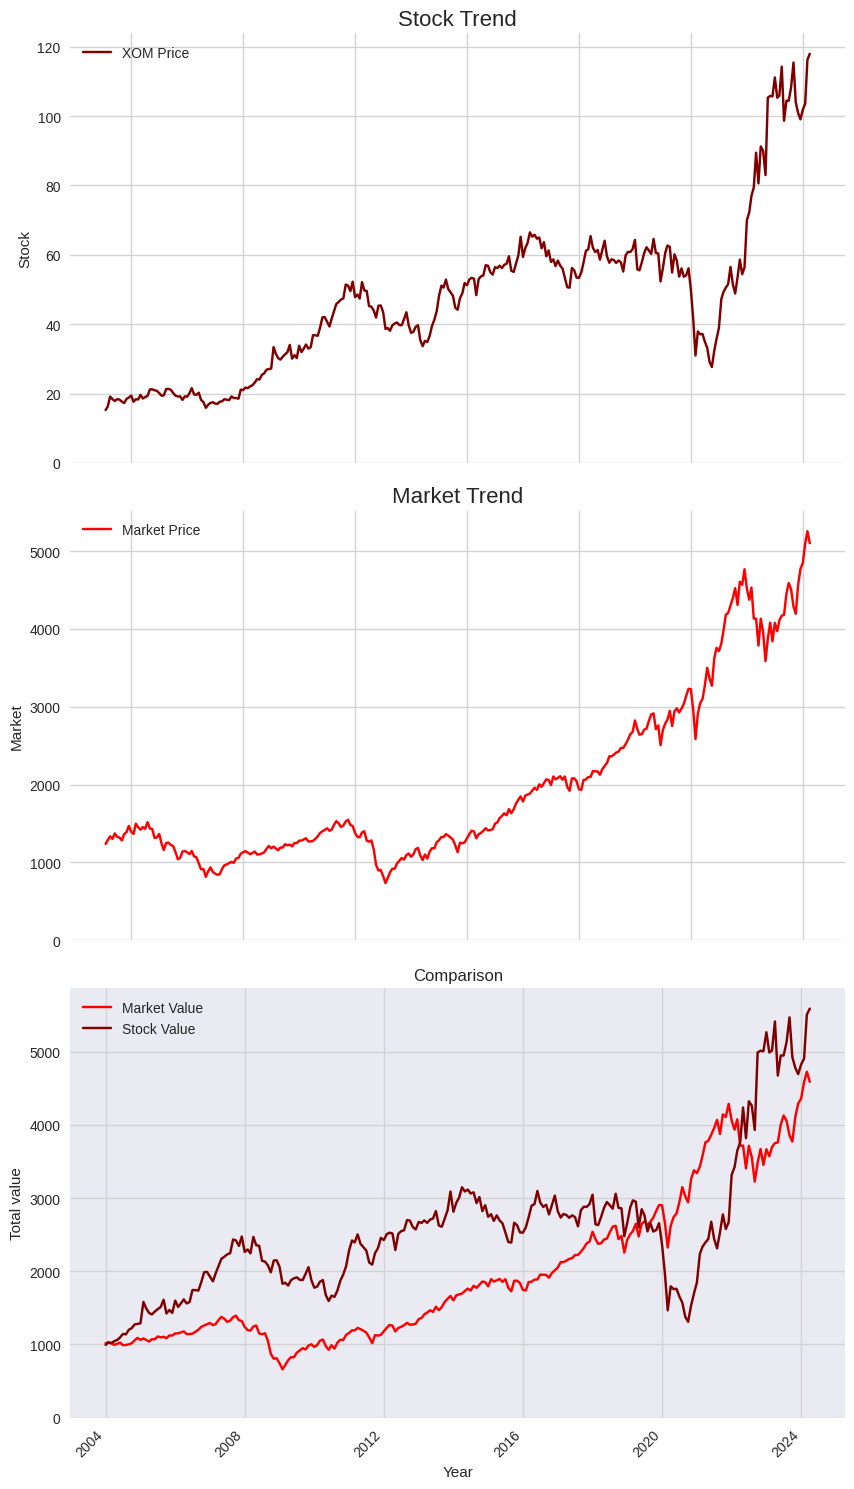

In [34]:
plt.style.use('seaborn')

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches(10, 15)
Max_Stock = Stock["Stock Value"].abs().max()*1.05
Max_Market = Market["Market Value"].abs().max()*1.05
max_abs_value = max(Max_Stock.max(), Max_Market.max()) * 1.05
max_abs_value_investment = max((COE["Market Investment"].max()), (COE["Stock Investment"].max())) * 1.05
axes[0].plot(Stock["Date"], Stock["Stock Value"], color = "maroon")
axes[0].set(title = "Stock Trend", xlabel = "Year", ylabel = "Stock")
axes[0].title.set_size(16)
plt.grid(color = "lightgray")
axes[1].plot(Market["Date"], Market["Market Value"], color = "red")
axes[1].set(title = "Market Trend", xlabel = "Year", ylabel = "Market")
axes[2].plot(COE["Date"], COE["Market Investment"],  color = "red")
axes[2].plot(COE["Date"], COE["Stock Investment"], color = "maroon")

axes[2].set(title = "Comparison", xlabel = "Year", ylabel = "Total value")


fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes[1].title.set_size(16)
axes[0].set_ylim([0,Max_Stock])
axes[1].set_ylim([0,Max_Market])
axes[2].set_ylim([0,max_abs_value_investment])

axes[0].set_facecolor('white') #make background behind grid white
axes[1].set_facecolor('white')
axes[0].legend([Trade_Name +" Price"] ,loc = 2) #move legend to right
axes[1].legend(["Market Price"] ,loc = 2)
axes[2].legend([ "Market Value", "Stock Value",] ,loc = 2)
fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes[0].grid(color = "lightgray")
axes[1].grid(color = "lightgray")
plt.show()

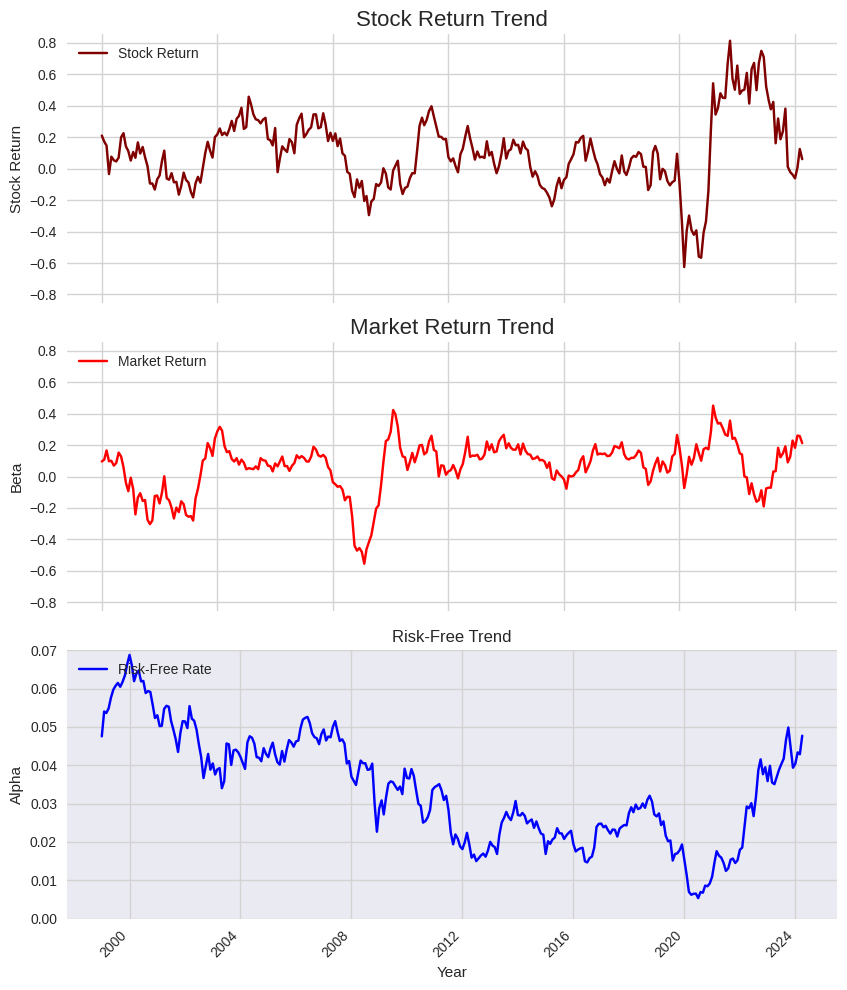

In [35]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches(10, 10)
Moving_average_Stock = Stock["Stock Return"].rolling(12).mean()*12
Moving_average_Market = Market["Market Return"].rolling(12).mean()*12
max_abs_value = max(Moving_average_Stock.abs().max(), Moving_average_Market.abs().max()) * 1.05
axes[0].plot(Stock["Date"], Moving_average_Stock, color = "maroon")
axes[0].set(title = "Stock Return Trend", xlabel = "Year", ylabel = "Stock Return")
axes[0].title.set_size(16)
#plt.grid(color = "lightgray")
axes[1].plot(Market["Date"], Moving_average_Market, color = "red")
axes[1].set(title = "Market Return Trend", xlabel = "Year", ylabel = "Beta")
axes[2].plot(Risk_Free["Date"], (1+Risk_Free["Risk-Free Return"])**12-1, color = "blue")
axes[2].set(title = "Risk-Free Trend", xlabel = "Year", ylabel = "Alpha")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes[1].title.set_size(16)
axes[0].set_ylim([-max_abs_value, max_abs_value])
axes[1].set_ylim([-max_abs_value, max_abs_value])
axes[2].set_ylim([0, Risk_Free["Risk-Free Return"].abs().max()*12*1.05])
axes[0].set_facecolor('white') #make background behind grid white
axes[1].set_facecolor('white')
axes[0].legend([ "Stock Return"] ,loc = 2) #move legend to right
axes[1].legend([ "Market Return"] ,loc = 2)
axes[2].legend([ "Risk-Free Rate"] ,loc = 2)
fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes[0].grid(color = "lightgray")
axes[1].grid(color = "lightgray")
axes[2].grid(color = "lightgray")
plt.show()

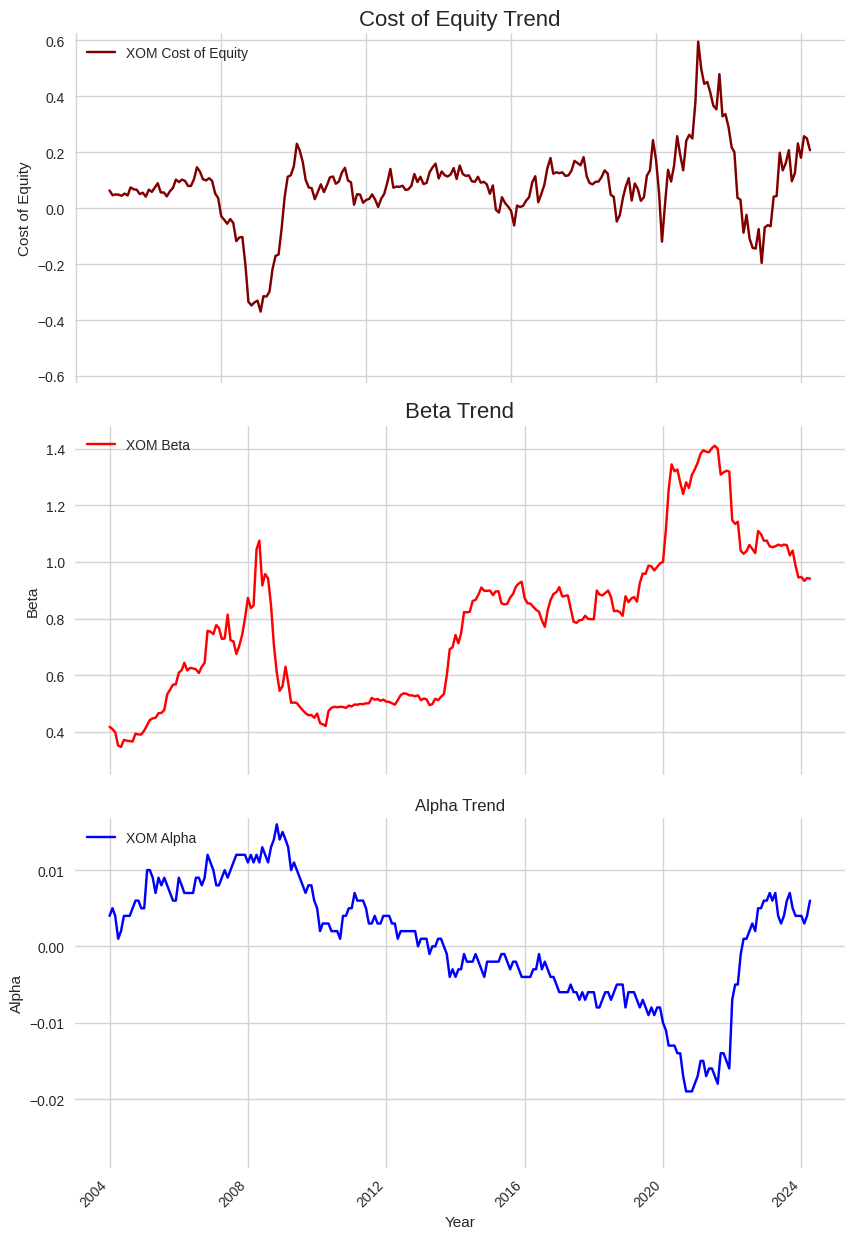

In [36]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022

fig, axes = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches(10, 12.5)
Moving_average = COE["Cost of Equity"].rolling(12).mean()*12
axes[0].plot(COE["Date"], Moving_average, color = "maroon")
axes[0].set(title = "Cost of Equity Trend", xlabel = "Year", ylabel = "Cost of Equity")
axes[0].title.set_size(16)
plt.grid(color = "lightgray")
axes[1].plot(COE["Date"], COE["Beta"], color = "red")
axes[1].set(title = "Beta Trend", xlabel = "Year", ylabel = "Beta")
axes[2].plot(COE["Date"], COE["Alpha"], color = "blue")
axes[2].set(title = "Alpha Trend", xlabel = "Year", ylabel = "Alpha")

fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes[1].title.set_size(16)
axes[0].set_ylim([-Moving_average.abs().max()*1.05,Moving_average.abs().max()*1.05])
axes[1].set_ylim([COE["Beta"].min()-0.1,COE["Beta"].max()*1.05])
axes[2].set_ylim([COE["Alpha"].min()-0.01,COE["Alpha"].max()*1.05])

axes[0].set_facecolor('white') #make background behind grid white
axes[1].set_facecolor('white')
axes[2].set_facecolor('white')

axes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
axes[1].legend([Trade_Name +" Beta"] ,loc = 2)
axes[2].legend([Trade_Name +" Alpha"] ,loc = 2)

fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes[0].grid(color = "lightgray")
axes[1].grid(color = "lightgray")
axes[2].grid(color = "lightgray")

plt.show()